# 📌 Running – Regression Project  

## 📖 Project Goal  

The primary objective of this project is to develop a **Machine Learning Regression Model** that can predict **how many kilometers a person would be able to run if they participated in a marathon**.  

This project utilizes the **Running dataset** from Kaggle, which contains detailed records of marathon and ultramarathon races held between **2020 and 2025**.  

The dataset provides a rich set of features, including:  
- 🧑 Demographic information  
- 🏃 Event details  
- ⏱️ Performance-related attributes  

These features make the dataset an excellent foundation for building predictive models and gaining insights into running performance.  


In [1]:
# Data Collection
import pandas as pd
import numpy as np

#Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Data partitioning and model tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# Calling regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Determining the explanatory power of a model (SHAP) 
import shap  




In [3]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.txt")

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_12764\473542341.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.txt")


In [4]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [ ]:
import pandas as pd

# Datasetni yuklash
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.txt")

# Dinamik yil oralig'i (boshlanish va tugash yillari)
start_year = 2020
end_year = 2025

# Faqat start_year va end_year oralig'idagi eventlarni olish
df_filtered = df[(df["Year of event"] >= start_year) & (df["Year of event"] <= end_year)]

# Yangi CSV faylga saqlash
output_file = f"Running_{start_year}_{end_year}.csv"
df_filtered.to_csv(output_file, index=False)

print(f"Filtering done! Saved as {output_file}")


C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_788\1544651479.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.txt")


✅ Filtering done! Saved as Running_2020_2025.csv


In [2]:
df = pd.read_csv("Running_2020_2025.csv")


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071405 entries, 0 to 1071404
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year of event              1071405 non-null  int64  
 1   Event dates                1071405 non-null  object 
 2   Event name                 1071405 non-null  object 
 3   Event distance/length      1071405 non-null  object 
 4   Event number of finishers  1071405 non-null  int64  
 5   Athlete performance        1071405 non-null  object 
 6   Athlete club               612999 non-null   object 
 7   Athlete country            1071404 non-null  object 
 8   Athlete year of birth      993536 non-null   float64
 9   Athlete gender             1071404 non-null  object 
 10  Athlete age category       993810 non-null   object 
 11  Athlete average speed      1071374 non-null  object 
 12  Athlete ID                 1071405 non-null  int64  
dtypes: float64(1

# 📊 Data Overview

### 🧮 Dataset Size:
- **1071405 entries**
- **13 columns**

### 🧹 Data Cleaning Status:
- **Athlete club                 458406**
- **Athlete country                   1**
- **Athlete year of birth         77869**
- **Athlete gender                    1**
- **Athlete age category          77595**
- **Athlete average speed            31**

### 🔢 Column Types:
- **Most columns are numeric (float64, int64, object)**

# 📊 Dataset Columns – Running_2020_2025

| Column Name       | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| `Year of event`   | The year when the race took place (1798–2022).                             |
| `Event`           | Name/type of the race (e.g., Marathon, Ultramarathon).                     |
| `Distance_km`     | The official race distance in kilometers.                                   |
| `Athlete`         | Name of the athlete who participated.                                       |
| `Gender`          | Athlete’s gender (Male/Female).                                             |
| `Age`             | Athlete’s age at the time of the event.                                     |
| `Country`         | Country the athlete represented.                                            |
| `Club`            | Athlete’s sports club or team affiliation.                                 |
| `Rank`            | Finishing position of the athlete in the race.                             |
| `Result_time`     | Recorded finish time (HH:MM:SS format).                                     |
| `Speed_kmh`       | Average running speed in kilometers per hour.                              |
| `Category`        | Age or event category (e.g., “M40” for Men aged 40–49).                    |
| `Event_id`        | Unique identifier for the race event.                                       |
| `Athlete_id`      | Unique identifier for the athlete.                                          |



# Data Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
class DataPreprocessing:
    def __init__(self, df):
        self.df = df.copy() 
        self.encoder = LabelEncoder()
        self.scaler = StandardScaler()

    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
                else:
                    self.df[col] = self.df[col].fillna(self.df[col].mean())
        return self

    def encodla(self):
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                if self.df[col].nunique() <= 6:
                    dummies = pd.get_dummies(self.df[col], prefix=col, dtype=int)
                    self.df = pd.concat([self.df.drop(columns=[col]), dummies], axis=1)
                else:
                    self.df[col] = self.encoder.fit_transform(self.df[col])
        return self

    def scaling_qil(self):
        numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        self.df[numeric_cols] = self.scaler.fit_transform(self.df[numeric_cols])
        return self
     

    def get_df(self):
        return self.df  
    


In [11]:

preprocessor = DataPreprocessing(df)
df_clean = (preprocessor
            .tozala()
            .encodla()
            .scaling_qil()
            .get_df())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071405 entries, 0 to 1071404
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year of event              1071405 non-null  float64
 1   Event dates                1071405 non-null  float64
 2   Event name                 1071405 non-null  float64
 3   Event distance/length      1071405 non-null  float64
 4   Event number of finishers  1071405 non-null  float64
 5   Athlete performance        1071405 non-null  float64
 6   Athlete club               1071405 non-null  float64
 7   Athlete country            1071405 non-null  float64
 8   Athlete year of birth      1071405 non-null  float64
 9   Athlete age category       1071405 non-null  float64
 10  Athlete average speed      1071405 non-null  float64
 11  Athlete ID                 1071405 non-null  float64
 12  Athlete gender_F           1071405 non-null  float64
 13  Athlete gend

In [22]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete age category',
       'Athlete average speed', 'Athlete ID', 'Athlete gender_F',
       'Athlete gender_M', 'Athlete gender_X'],
      dtype='object')

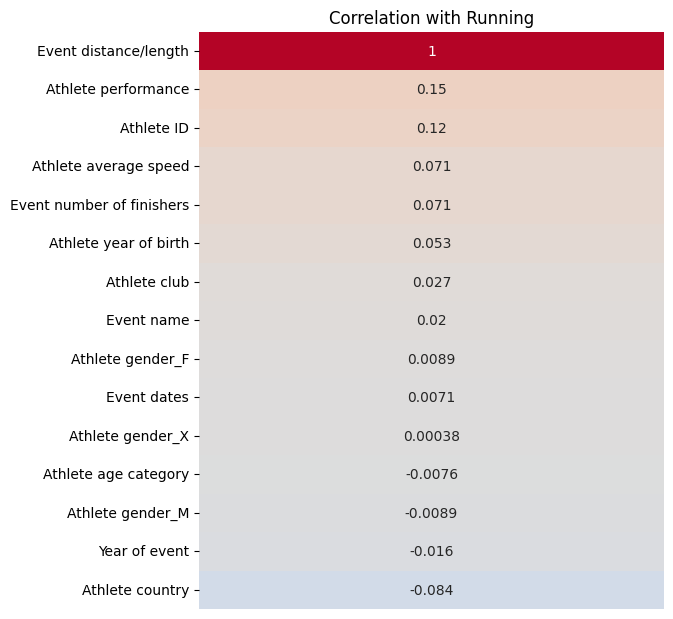

In [23]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['Event distance/length'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with Running')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()


In [2]:
import shutil

# Joriy notebook nomi
current_notebook = "Data_Preprocessing.ipynb"

# Saqlash manzili
save_path = r"C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Feature_Enginering\Feature_Enginering.ipynb"

# Faylni ko'chirish / nusxa olish
shutil.copy(current_notebook, save_path)
print("✅ Notebook saqlandi:", save_path)


✅ Notebook saqlandi: C:\Users\Rasulbek_Ruzmetov\Desktop\RUNNING\DATA\Feature_Enginering\Feature_Enginering.ipynb
